In [3]:
pip install spacy

     --------------------------------------- 12.2/12.2 MB 31.2 MB/s eta 0:00:00
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
     ---------------------------------------- 482.8/482.8 kB ? eta 0:00:00
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached pathy-0.10.1-py3-none-any.whl (48 kB)
     ---------------------------------------- 1.5/1.5 MB 47.3 MB/s eta 0:00:00
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
  Using cached wasabi-1.1.1-py3-none-any.whl (27 kB)
     ---------------------------------------- 2.2/2.2 MB 35.0 MB/s eta 0:00:00
     ---------------------------------------- 96.8/96.8 kB 5.4 MB/s eta 0:00:00
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached confection-0.0.4-py3-none-any.whl (32 kB)
     ---------------------------------------- 7.0/7.0 MB 40.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

                                              0.0/11.2 MB ? eta -:--:--
                                              0.0/11.2 MB ? eta -:--:--
                                             0.0/11.2 MB 325.1 kB/s eta 0:00:35
                                             0.0/11.2 MB 325.1 kB/s eta 0:00:35
                                             0.1/11.2 MB 363.1 kB/s eta 0:00:31
                                             0.1/11.2 MB 554.9 kB/s eta 0:00:20
                                             0.2/11.2 MB 655.4 kB/s eta 0:00:17
                                             0.3/11.2 MB 896.4 kB/s eta 0:00:13
     -                                        0.4/11.2 MB 1.0 MB/s eta 0:00:11
     -                                        0.5/11.2 MB 1.3 MB/s eta 0:00:09
     --                                       0.6/11.2 MB 1.4 MB/s eta 0:00:08
     --                                       0.7/11.2 MB 1.5 MB/s eta 0:00:07
     --                                       0.8/11.2 MB 1.

In [4]:
pip install spacytextblob


  Using cached spacytextblob-4.0.0-py3-none-any.whl (4.5 kB)
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)


In [5]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 17.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
!pip install bs4


  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=e76573f216eecc7567049b45381fbceed723a8595c853f002e864ef3549c3dd4
  Stored in directory: c:\users\biehl\appdata\local\pip\cache\wheels\8b\ac\c5\cb646ab01df6f353a9994b1c97dffb94f9b12013d64c162c58
Successfully built bs4


In [59]:
!pip install gensim==3.8.3

In [2]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [3]:
# Loading our two pipelines
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

config = {"punct_chars": [".", "?", "!", "。"]}
nlp.add_pipe('sentencizer', config=config)

In [4]:
# Using panda to load in our .csv file
df = pd.read_csv("urls.csv") # File we are checking
urls = df["Address"].tolist() # Column name we are checking
url_sent_score = []
url_sent_label = []
url_subj_score = []
url_subj_label = []
total_pos = []
total_neg = []

In [5]:
def get_named_entities(doc):
    ent_list = []
    for ent in doc.ents:
        ent_list.append((ent.text,ent.label_))
    return ent_list

def get_sentences(doc):
    return doc.sents

def get_sentence_list(doc):
    return [sent for sent in doc.sents]

def sentence_sentiment_from_doc(doc):
    sentences = get_sentences(doc)
    tuple_list = []
    for sentence in sentences:
        sent_doc = nlp(sentence.text)
        tuple_list.append((sentence,sent_doc._.blob.polarity))
    return tuple_list

#def sentence_sentiment_on_named_entities(doc):
    

In [6]:
#https://pypi.org/project/spacytextblob/
for count, x in enumerate(urls):
    try:
        url = x

        headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'}
        res = requests.get(url,headers=headers)
        html_page = res.text

        soup = BeautifulSoup(html_page, 'html.parser')
        for script in soup(["script", "style","meta","label","header","footer"]):
            script.decompose()
        page_text = (soup.get_text()).lower()
        page_text = page_text.strip().replace("  ","")
        page_text = "".join([s for s in page_text.splitlines(True) if s.strip("\r\n")])

        # Start the sentiment analysis now
        doc = nlp(page_text)
        sentiment = doc._.blob.polarity
        sentiment = round(sentiment,2)
        subjectivity = doc._.blob.subjectivity
        subjectivity = round(subjectivity,2)
        
        #exploration of single topic modeling and sentiment
        #print(doc._.blob.sentiment_assessments)
        #print([(w.text, w.pos_) for w in doc])
        
        if count / 1 == 1:
            print("enter test spot\n")
            ent_list = get_named_entities(doc)
            #print(ent_list)
            sentence_sentiment_list = sentence_sentiment_from_doc(doc)
            print(sentence_sentiment_list)
            break
            
        #print("\n")

        # Gives positive or negative label
        if sentiment >= -0.033 and sentiment <= 0.043:
            sent_label = "Neutral"
        elif sentiment > 0.043 and sentiment < 0.143:
            sent_label = "Neutral Positive"
        elif sentiment > 0.143:
            sent_label = "Positive"
        elif sentiment < -0.033 and sentiment > -0.062:
            sent_label = "Neutral Negative"
        elif sentiment < -0.062:
            sent_label = "Negative"

        url_sent_label.append(sent_label)
        url_sent_score.append(sentiment)
        url_subj_score.append(subjectivity)

        positive_words = []
        negative_words = []

        for x in doc._.blob.sentiment_assessments.assessments:
          if x[1] > 0:
            positive_words.append(x[0][0])
          elif x[1] < 0:
            negative_words.append(x[0][0])
          else:
            pass

        total_pos.append(', '.join(set(positive_words)))
        total_neg.append(', '.join(set(negative_words)))
    except:
        url_sent_label.append("Error")
        url_sent_score.append(0.0)
        url_subj_score.append(0.0)

        positive_words = []
        negative_words = []

        total_pos.append(', '.join(set(positive_words)))
        total_neg.append(', '.join(set(negative_words)))

# print("The average sentiment score was: " + str(sum(url_sent_score) / len(url_sent_score)))
# print("The average subjectivity score was: " + str(sum(url_subj_score) / len(url_subj_score)))

# df["Sentiment Score"] = url_sent_score
# df["Sentiment Label"] = url_sent_label
# df["Subjectivity Score"] = url_subj_score
# df["Positive Words"] = total_pos
# df["Negative Words"] = total_neg

# df

enter test spot

[(11 minutes of aerobics daily lowers disease risk, study says | cnn
 
 
11 minutes of daily exercise could have a positive impact on your health, large study shows
			by kristen rogers, cnn
		
updated
6:45 am est, wed march 1, 2023
link copied!
 
, 0.12378246753246752), (this may look silly, but a new study reveals its benefits to your daily routine
02:34
 - source:
cnn
your health
16 videos
this may look silly, but a new study reveals its benefits to your daily routine
02:34
now playing
 - source:
, -0.12121212121212122), (cnn
if you have allergies, you may want to avoid this type of medication
02:18
now playing
 - source:
cnn
doctor explains new over-the-counter medicine that's a 'complete antidote to opioids'
01:59
now playing
 - source:
cnn
maternity wards across the us are closing because of this issue
02:31
now playing
 - source:
cnn
nearly 40% of dementia cases can be prevented with one small health change
02:13
now playing
 - source:
cnn
this type of exercise 

In [7]:
x = get_sentence_list(doc)



In [8]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.models import FastText
#from gensim.models.wrappers import LdaMallet

import numpy as np
import os
from random import shuffle
import re
import fasttext
import fasttext.util
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt 
import numpy as np
import pyLDAvis
import pyLDAvis.gensim


In [9]:
input_text = []
input_text = [str(sentence) for sentence in x]


In [10]:
fasttext.util.download_model('en', if_exists='ignore')  # English

'cc.en.300.bin'

In [11]:
ft_model = fasttext.load_model('cc.en.300.bin')

In [12]:
# store as list of lists of words
sentences_ted = []
for sent_str in input_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", sent_str.lower()).split()
    sentences_ted.append(tokens)

stoplist = []
with open('stopwords') as openfileobject:
    for line in openfileobject:
        stoplist.append(line[:-1])
stoplist = set(stoplist)

for i in range(len(sentences_ted)):
    for word in reversed(sentences_ted[i]):
        if word in stoplist:
            sentences_ted[i].remove(word)

In [13]:
#model = FastText(vector_size=500, window=2, min_count=1)  # instantiate
#model.build_vocab(corpus_iterable=sentences_ted)
#model.train(corpus_iterable=sentences_ted, total_examples=len(sentences_ted), epochs=50)  # train
num_topics = 10
dictionary = Dictionary(sentences_ted)
dictionary.filter_extremes(no_below=0.1, no_above=0.9)
bow_corpus = [dictionary.doc2bow(text) for text in sentences_ted]
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)


In [14]:
file = open("out.txt", "w")

for topic_id, topic_words in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    print(f"Topic {topic_id + 1}:")
    for word, weight in topic_words:
        print(f"\t{word}: {weight}")

Topic 1:
	rethink: 0.014794046059250832
	mindset: 0.014794026501476765
	think: 0.014743261970579624
	leandro: 0.01472916267812252
	lecturer: 0.014727260917425156
	dentistry: 0.014726114459335804
	medicine: 0.014724139124155045
	school: 0.014723788015544415
	biomedical: 0.014722247608006
	university: 0.014720695093274117
Topic 2:
	good: 0.029636524617671967
	exercise: 0.0224547628313303
	said: 0.02215886116027832
	week: 0.01677604392170906
	physical: 0.016410602256655693
	minutes: 0.01620679348707199
	activity: 0.0160518791526556
	amount: 0.015219076536595821
	epidemiology: 0.015218685381114483
	recommended: 0.015211126767098904
Topic 3:
	include: 0.021475354209542274
	cancer: 0.021459633484482765
	aerobic: 0.011277429759502411
	exercise: 0.011273074895143509
	improvement: 0.011271686293184757
	function: 0.011265580542385578
	said: 0.01126326248049736
	body: 0.011256812140345573
	activities: 0.011255570687353611
	walking: 0.011255552060902119
Topic 4:
	activity: 0.043718233704566956
	pe

In [15]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=sentences_ted, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)


nCoherence Score:  0.4767281172291664


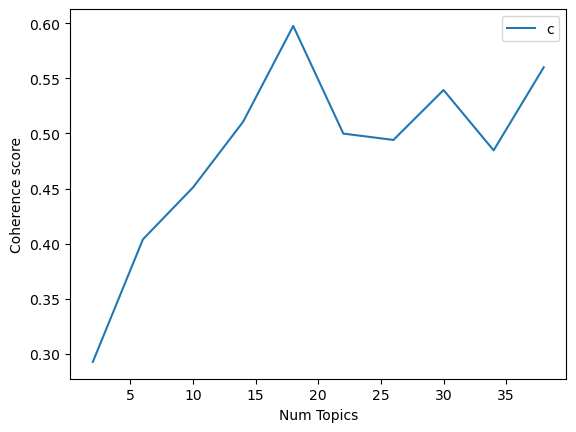

In [18]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=sentences_ted, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=sentences_ted, start=2, limit=40, step=4)
# Show graph
limit=40; start=2; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [19]:
best_result_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_result_index]
# Select the model and print the topics
model_topics = optimal_model.show_topics(formatted=False)
print(f'''The {x[best_result_index]} topics gives the highest coherence score 
of {coherence_values[best_result_index]}''')

The 18 topics gives the highest coherence score 
of 0.597488774471451


In [ ]:
noun_model_topics = []
for topic in model_topics:
    nouns = []
    for word, weight in topic[1]:
        pos = pos_tag(word_tokenize(word))[0][1]
        if pos.startswith('N'):
            nouns.append((word, weight))
    noun_model_topics.append((topic[0], nouns))
    
type(model_topics[1][0])
noun_model_topics

In [21]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(optimal_model, bow_corpus, dictionary)
p

c:\Users\biehl\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.334303 -0.002026       1        1  14.359467
17     0.028654  0.079393       2        1  13.750501
7     -0.109996  0.025667       3        1  12.774413
10    -0.037738 -0.110044       4        1  10.525923
6     -0.074763  0.168254       5        1   6.755265
2     -0.049439 -0.125729       6        1   6.306351
12    -0.035796 -0.046091       7        1   5.219850
0      0.018382 -0.001055       8        1   5.118283
11    -0.005024 -0.070728       9        1   4.796532
5     -0.028069  0.088994      10        1   4.157908
13     0.025036  0.105942      11        1   3.968276
9     -0.017481 -0.069534      12        1   3.600321
3     -0.036973 -0.021363      13        1   2.931969
15    -0.045109  0.021561      14        1   2.473670
14    -0.012236 -0.032991      15        1   1.843917
4      0.011582 -0.006472      16        1   0.846749
1      0.017338 -0.001879      17        1   0.285302
16     0.017329 -0.001898      18        1   0.285302, topic_info=           Term       Freq      Total Category  logprob  loglift
40       source  14.000000  14.000000  Default  30.0000  30.0000
6           cnn  19.000000  19.000000  Default  29.0000  29.0000
36      playing  14.000000  14.000000  Default  28.0000  28.0000
22         risk  10.000000  10.000000  Default  27.0000  27.0000
169       lower   7.000000   7.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
13       health   0.005520   5.642228  Topic18  -6.1600  -1.0702
276      public   0.005520   1.953126  Topic18  -6.1601  -0.0095
405       baton   0.005519   1.335833  Topic18  -6.1601   0.3704
367    diseases   0.005519   2.135249  Topic18  -6.1601  -0.0987
420  population   0.005519   1.335833  Topic18  -6.1601   0.3703

[811 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
42        1  0.830171        01
29        1  0.777939        02
29        2  0.111134        02
44        1  0.882866        05
0         8  0.831471         1
...     ...       ...       ...
194      10  0.588867     would
194      11  0.588867     would
345       6  0.804173     wrote
233       3  0.745095     years
253      14  0.964084  zhongfei

[612 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 18, 8, 11, 7, 3, 13, 1, 12, 6, 14, 10, 4, 16, 15, 5, 2, 17])

In [22]:
for topic_id, topic_words in model_topics:
    print(f"Topic {topic_id + 1}:")
    for word, weight in topic_words:
        print(f"\t{word}: {weight}")

Topic 10:
	better: 0.01810893602669239
	none: 0.018108930438756943
	university: 0.018093163147568703
	resistance: 0.01809300296008587
	mechanisms: 0.018088895827531815
	influences: 0.018088005483150482
	maintenance: 0.01808737777173519
	improvement: 0.018086658790707588
	composition: 0.018086427822709084
	wide: 0.018086053431034088
Topic 13:
	exercise: 0.027653474360704422
	kids: 0.027653122320771217
	shouldn: 0.027653122320771217
	participants: 0.0142005430534482
	minimum: 0.014200516976416111
	study: 0.014200481586158276
	recommended: 0.01420038752257824
	amount: 0.014200343750417233
	mean: 0.014200134202837944
	half: 0.014200134202837944
Topic 15:
	specific: 0.024934252724051476
	activity: 0.024934248998761177
	authors: 0.024934248998761177
	every: 0.024934248998761177
	didn: 0.024934247136116028
	little: 0.024934247136116028
	participants: 0.024934247136116028
	types: 0.02493424341082573
	details: 0.02493424341082573
	exercise: 0.02493424341082573
Topic 1:
	11: 0.041844774037599564

In [27]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

[(9,
  [('none', 0.01810893),
   ('university', 0.018093163),
   ('resistance', 0.018093003),
   ('mechanisms', 0.018088896),
   ('influences', 0.018088005),
   ('maintenance', 0.018087378),
   ('improvement', 0.018086659),
   ('composition', 0.018086428)]),
 (12,
  [('exercise', 0.027653474),
   ('kids', 0.027653122),
   ('shouldn', 0.027653122),
   ('participants', 0.014200543),
   ('minimum', 0.014200517),
   ('study', 0.014200482),
   ('amount', 0.014200344),
   ('mean', 0.014200134),
   ('half', 0.014200134)]),
 (14,
  [('activity', 0.024934249),
   ('authors', 0.024934249),
   ('didn', 0.024934247),
   ('participants', 0.024934247),
   ('types', 0.024934243),
   ('details', 0.024934243),
   ('exercise', 0.024934243)]),
 (0,
  [('minutes', 0.04182148),
   ('study', 0.028160542),
   ('cnn', 0.028149411),
   ('research', 0.026325293),
   ('exercise', 0.024174381),
   ('disease', 0.022172762),
   ('risk', 0.022113925)]),
 (6,
  [('risk', 0.069639154),
   ('cardiovascular', 0.03467270